In [1846]:
%matplotlib inline
from __future__ import division
import peakutils as pk
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import scipy.stats as stats
from scipy.optimize import curve_fit
import matplotlib.patches as patches

# Utilities

In [1847]:
wd = os.getcwd()
rootdatadir = os.path.join(wd, "data/")

In [1848]:
def spelength(filename, filedir):
    with open(os.path.join(filedir, filename)) as f:
        data = f.read()
    data = data.split("\n")
    datalen = data[11].split()
    datalen = int(datalen[1])
    return datalen

In [1849]:
def spedata(filename, filedir):
    firstdataline = 13
    with open(os.path.join(filedir, filename)) as f:
        data = f.read()
    data = data.split("\n")
    data = data[firstdataline:firstdataline + spelength(filename, filedir)]
    data = np.array([int(i) for i in data])
    return data

In [1850]:
def spetime(filename, filedir):
    with open(os.path.join(filedir, filename)) as f:
        data = f.read()
    data = data.split("\n")
    time = data[9].split(" ")[0]
    return int(time)

# Data analysis

## MCA Linearity

In [1851]:
datadir = os.path.join(rootdatadir, "maestro/Spectra/")

In [1852]:
filename = "thulab8mcalinear.Spe"

In [1853]:
d = spedata(filename, datadir)

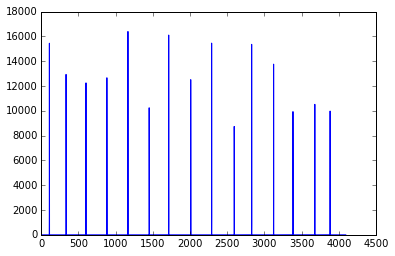

In [1854]:
plt.plot(d)
plt.show()

In [1855]:
volts = np.array([0.28,0.84,1.50,2.20,2.92,3.64,4.32,5.04,5.76,6.56,7.12,7.84,8.60,9.20,9.80])
channels = pk.indexes(d)

In [1856]:
func = stats.linregress(volts, channels)
print(func.slope)
print(func.intercept)
print(func.rvalue ** 2)

396.398660247
5.15555414295
0.999902663718


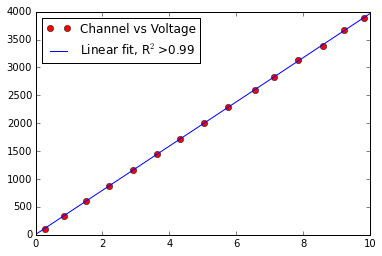

In [1857]:
f = plt.figure()
ax1 = f.add_subplot(111)
ax1.plot(volts, channels, 'ro', label='Channel vs Voltage')
ax1.plot(
    np.linspace(0,10,100), 
    [func.slope * x + func.intercept for x in np.linspace(0,10,100)],
    label=r'Linear fit, R$^2$>0.99'
)
ax1.legend(loc='upper left')
plt.show()

# Spectroscopy with HPGE detector

In [1858]:
datadir = os.path.join(rootdatadir, "maestro/Spectra/efrancis/")

In [1859]:
peak_energies = []
peak_channels = []

In [1860]:
def gauss(x, mu, sigma, a):
    fp = a / np.sqrt(2 * np.pi * sigma ** 2)
    exppart = - (x - mu) ** 2 / (2 * sigma) ** 2
    
    return fp * np.exp(exppart)

## Determine energy to channel relationship

### Background

In [1861]:
bkg = spedata("bkg.Spe", datadir) / spetime("bkg.Spe", datadir)

In [1862]:
print(bkg)

[ 0.  0.  0. ...,  0.  0.  0.]


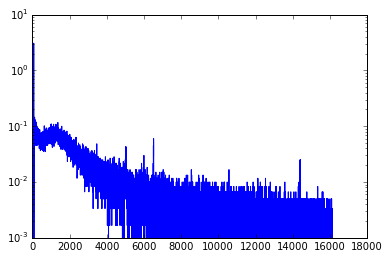

In [1863]:
plt.plot(bkg)
plt.yscale('log')
plt.show()

### Na-22

In [1864]:
na22 = spedata("Na22.Spe", datadir) / spetime("Na22.Spe", datadir) - bkg

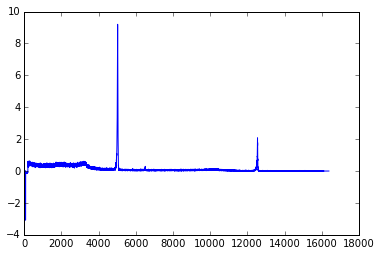

In [1865]:
plt.plot(na22)
plt.show()

In [1866]:
pk.indexes(na22, thres=0.4, min_dist=300)

array([ 5024, 12544])

In [1867]:
map(peak_energies.append, [511, 1274])
map(peak_channels.append, pk.indexes(na22, thres=0.4, min_dist=300))

[None, None]

### Mn-54

In [1868]:
mn54 = spedata("Mn54.Spe", datadir) / spetime("Mn54.Spe", datadir) - bkg

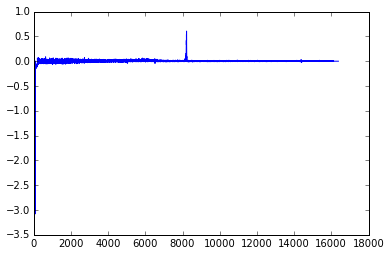

In [1869]:
plt.plot(mn54)
plt.show()

In [1870]:
pk.indexes(mn54, thres=0.9, min_dist=300)

array([8217])

In [1871]:
map(peak_energies.append, [835])
map(peak_channels.append, pk.indexes(mn54, thres=0.9, min_dist=300))

[None]

## Co-57

In [1872]:
co57 = spedata("Co57.Spe", datadir) / spetime("Co57.Spe", datadir) - bkg

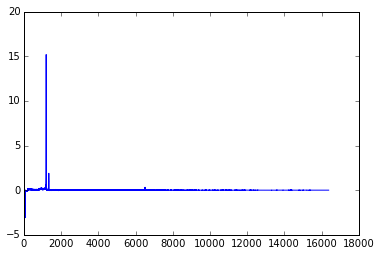

In [1873]:
plt.plot(co57)
plt.show()

In [1874]:
pk.indexes(co57, thres=0.24, min_dist=20)

array([1194, 1336])

In [1875]:
map(peak_energies.append, [122, 136])
map(peak_channels.append, pk.indexes(co57, thres=0.24, min_dist=20))

[None, None]

## Co-60

In [1876]:
co60 = spedata("Co60.Spe", datadir) / spetime("Co60.Spe", datadir) - bkg

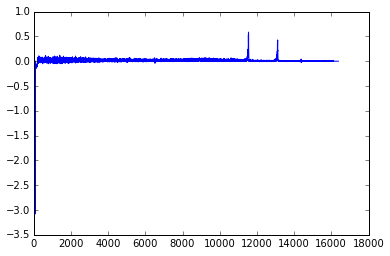

In [1877]:
plt.plot(co60)
plt.show()

In [1878]:
pk.indexes(co60, thres=0.9, min_dist=50)

array([11547, 13116])

In [1879]:
map(peak_energies.append, [1173, 1332])
map(peak_channels.append, pk.indexes(co60, thres=0.9, min_dist=50))

[None, None]

## Cd-109

In [1880]:
cd109 = spedata("Cd109.Spe", datadir) / spetime("Cd109.Spe", datadir) - bkg

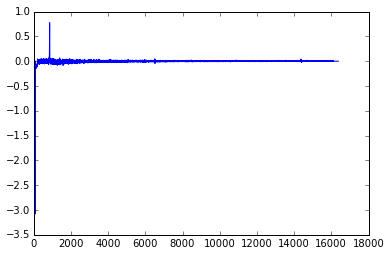

In [1881]:
plt.plot(cd109)
plt.show()

In [1882]:
pk.indexes(cd109, thres=0.9, min_dist=50)

array([858])

In [1883]:
map(peak_energies.append, [88.04])
map(peak_channels.append, pk.indexes(cd109, thres=0.9, min_dist=50))

[None]

## Ba-133

In [1884]:
ba133 = spedata("Ba133.Spe", datadir) / spetime("Ba133.Spe", datadir) - bkg

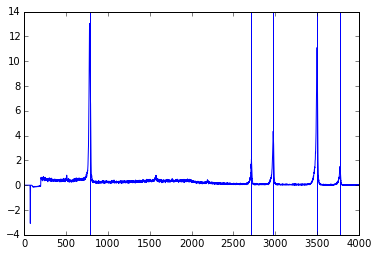

In [1885]:
plt.plot(ba133)
plt.xlim(0,4000)
for x in ba133peak:
    plt.axvline(x=x)
plt.show()

In [1886]:
ba133ind = pk.indexes(ba133[500:4000], thres=0.1, min_dist=90) + 500
print(ba133ind)

[ 782 2715 2974 3499 3773]


In [1887]:
ba133peak = pk.interpolate(np.array([i for i in range(len(ba133))]), ba133, ind=ba133ind)

In [1888]:
print(ba133peak)

[  782.46998713  2714.3001057   2974.75706087  3498.12342877  3772.44441529]


In [1889]:
map(peak_energies.append, [80.9971, 276.398, 302.853, 356.017, 383.851])
map(peak_channels.append, ba133peak)

[None, None, None, None, None]

## Cs-137

In [1890]:
cs137 = spedata("Cs137.Spe", datadir) / spetime("Cs137.Spe", datadir) - bkg

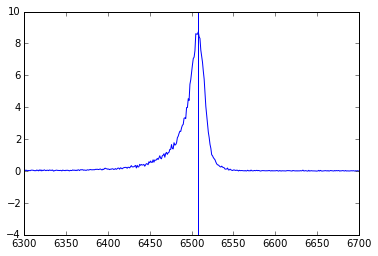

In [1891]:
plt.plot(cs137)
plt.xlim(6300,6700)
plt.axvline(x=6508)
plt.show()

In [1892]:
cs137ind = pk.indexes(cs137[6300:6700], thres=0.1, min_dist=90) + 6300
print(cs137ind)

[6508]


In [1893]:
cs137peak = pk.interpolate(np.array([i for i in range(len(ba133))]), ba133, ind=cs137ind)
print(cs137peak)

[ 6501.21402874]


In [1894]:
map(peak_energies.append, [661.7])
map(peak_channels.append, cs137ind)

[None]

## Energy to channel

In [1895]:
print(peak_energies)
print(peak_channels)

[511, 1274, 835, 122, 136, 1173, 1332, 88.04, 80.9971, 276.398, 302.853, 356.017, 383.851, 661.7]
[5024, 12544, 8217, 1194, 1336, 11547, 13116, 858, 782.46998712801496, 2714.3001056999442, 2974.7570608744745, 3498.123428773114, 3772.4444152948104, 6508]


In [1896]:
np.polyfit(y=peak_energies, x=peak_channels, deg=1, full=True)

(array([ 0.10149066,  0.986372  ]),
 array([ 0.8264144]),
 2,
 array([ 1.33401429,  0.46947404]),
 3.1086244689504383e-15)

In [1897]:
def channel2energy(ch):
    fit = stats.linregress(peak_channels, peak_energies)
    a = fit.slope
    b = fit.intercept
    return a * ch + b

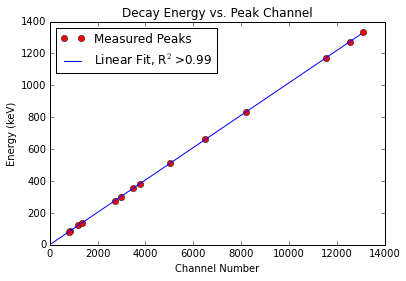

In [1898]:
plt.plot(peak_channels, peak_energies, 'ro', label="Measured Peaks")
x = np.linspace(0, 13000, 13000)
plt.plot(x, channel2energy(x), label=r'Linear Fit, R$^2$>0.99')
plt.ylabel("Energy (keV)")
plt.xlabel("Channel Number")
plt.title("Decay Energy vs. Peak Channel")
plt.legend(loc="upper left")
plt.show()

In [1899]:
fit = stats.linregress(peak_channels, peak_energies)
fit.rvalue ** 2

0.99999968290223662

In [1900]:
energies = channel2energy(np.arange(0, len(bkg), 1))

In [1901]:
print(energies)

[  9.86371996e-01   1.08786266e+00   1.18935332e+00 ...,   1.66340343e+03
   1.66350492e+03   1.66360641e+03]


In [1902]:
len(energies)

16383

# Here we go again!

## Background

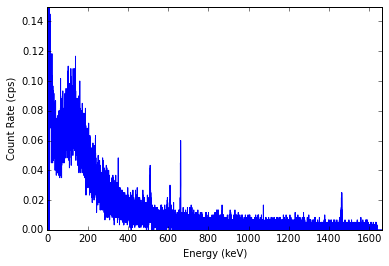

In [1903]:
plt.plot(energies, bkg, '-')
plt.ylim(0,0.15)
plt.xlim(0,max(energies))
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.show()

## Na-22

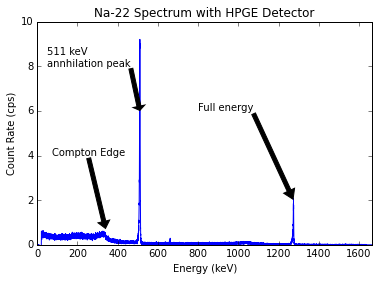

In [1904]:
plt.plot(energies, na22, label="Background Corrected")
plt.ylim(0,10)
plt.xlim(0,max(energies))
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Na-22 Spectrum with HPGE Detector")

plt.annotate('511 keV\nannhilation peak', xy=(511,6), 
             xytext=(50,8), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('Full energy', xy=(1274,2), 
             xytext=(800,6), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('Compton Edge', xy=(0.667*511,0.7), 
             xytext=(75,4), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

### 511 keV peak

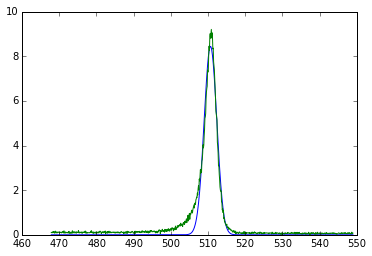

In [1905]:
popt, pcov = curve_fit(gauss, energies[4600:5400], na22[4600:5400], p0=[100, 511, 0.8])
plt.plot(energies[4600:5400], gauss(energies[4600:5400], *popt))
plt.plot(energies[4600:5400], na22[4600:5400])
plt.show()

In [1906]:
popt

array([ 510.64691963,    1.20299897,   25.45255754])

In [1907]:
print("Area under the curve: {}".format(sum([na22[i] for i in range(len(na22)) if na22[i] > 0 ])))
print("Photopeak efficiency: {}".format(popt[2] / sum([na22[i] for i in range(len(na22)) if na22[i] > 0 ])))

Area under the curve: 2338.53666667
Photopeak efficiency: 0.0108839676998


### 1274 keV peak

[  1.27372279e+03  -1.16745656e+00   4.47797941e+00]


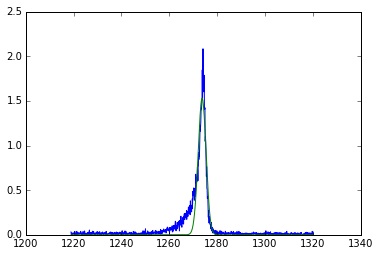

In [1908]:
popt, pcov = curve_fit(gauss, energies[12000:13000], na22[12000:13000], p0=[100, 1274, 0.8])
print(popt)
plt.plot(energies[12000:13000], na22[12000:13000])
plt.plot(energies[12000:13000], gauss(energies[12000:13000], *popt))
plt.ylim(0,2.5)
plt.show()

In [1909]:
print("Area under the curve: {}".format(sum([na22[i] for i in range(len(na22)) if na22[i] > 0 ])))
print("Photopeak efficiency: {}".format(popt[2] / sum([na22[i] for i in range(len(na22)) if na22[i] > 0 ])))

Area under the curve: 2338.53666667
Photopeak efficiency: 0.00191486388842


# Mn-54

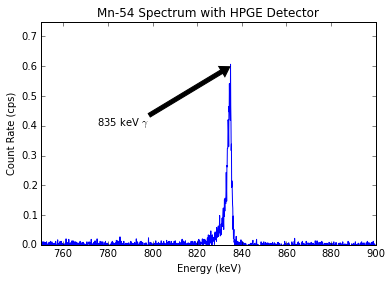

In [1910]:
plt.plot(energies, mn54)
plt.ylim(0,0.75)
plt.xlim(0,max(energies))
plt.xlim(750,900)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Mn-54 Spectrum with HPGE Detector")
plt.annotate(r'835 keV $\gamma$', xy=(835,0.6), 
             xytext=(775,0.4), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

### 835 keV peak

[  8.34373165e+02  -7.34266952e-01   8.61075322e-01]


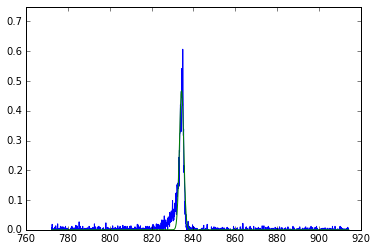

In [1911]:
popt, pcov = curve_fit(gauss, energies[7600:9000], mn54[7600:9000], p0=[1, 835, 0.8])
print(popt)
plt.plot(energies[7600:9000], mn54[7600:9000])
plt.plot(energies[7600:9000], gauss(energies[7600:9000], *popt))
plt.ylim(0,0.75)
plt.show()

In [1912]:
print("Area under the curve: {}".format(sum([mn54[i] for i in range(len(mn54)) if mn54[i] > 0 ])))
print("Photopeak efficiency: {}".format(popt[2] / sum([mn54[i] for i in range(len(mn54)) if mn54[i] > 0 ])))

Area under the curve: 82.5433333333
Photopeak efficiency: 0.0104317973049


## Co-57

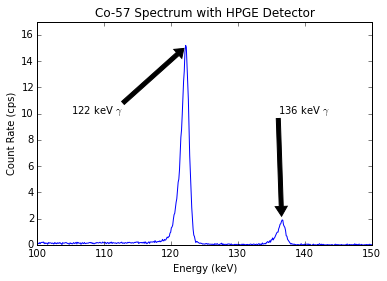

In [1913]:
plt.plot(energies, co57)
plt.ylim(0,17)
plt.xlim(100,150)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Co-57 Spectrum with HPGE Detector")
plt.annotate(r'122 keV $\gamma$', xy=(122,15), 
             xytext=(105,10), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate(r'136 keV $\gamma$', xy=(136.5,2.1), 
             xytext=(136,10), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

### 122 keV

[ 122.07018214   -0.44418378   15.69099311]


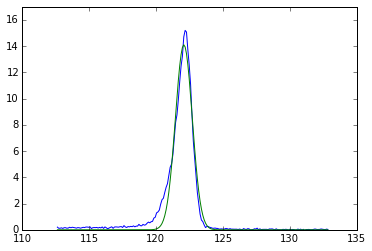

In [1914]:
popt, pcov = curve_fit(gauss, energies[1100:1300], co57[1100:1300], p0=[1, 122, 0.8])
print(popt)
plt.plot(energies[1100:1300], co57[1100:1300])
plt.plot(energies[1100:1300], gauss(energies[1100:1300], *popt))
plt.ylim(0,17)
plt.show()

In [1915]:
print("Area under the curve: {}".format(sum([co57[i] for i in range(len(co57)) if co57[i] > 0 ])))
print("Photopeak efficiency: {}".format(popt[2] / sum([co57[i] for i in range(len(co57)) if co57[i] > 0 ])))

Area under the curve: 413.2
Photopeak efficiency: 0.0379743298952


### 136 keV

[ 136.46159336   -0.45145416    1.90485973]


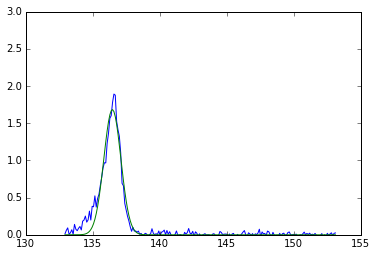

In [1916]:
popt, pcov = curve_fit(gauss, energies[1300:1500], co57[1300:1500], p0=[1, 122, 0.8])
print(popt)
plt.plot(energies[1300:1500], co57[1300:1500])
plt.plot(energies[1300:1500], gauss(energies[1300:1500], *popt))
plt.ylim(0,3)
plt.show()

In [1917]:
print("Area under the curve: {}".format(sum([co57[i] for i in range(len(co57)) if co57[i] > 0 ])))
print("Photopeak efficiency: {}".format(popt[2] / sum([co57[i] for i in range(len(co57)) if co57[i] > 0 ])))

Area under the curve: 413.2
Photopeak efficiency: 0.00461001871694


## Co-60

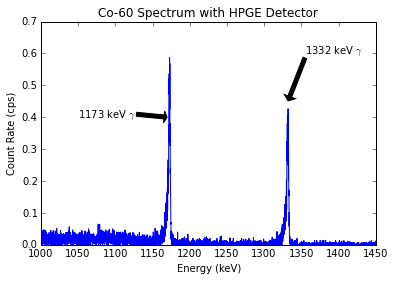

In [1918]:
f = plt.figure()
ax1 = f.add_subplot(111)
ax1.plot(energies, co60)
ax1.set_ylim(0,0.7)
ax1.set_xlim(1000,1450)
ax1.set_ylabel("Count Rate (cps)")
ax1.set_xlabel("Energy (keV)")
ax1.set_title("Co-60 Spectrum with HPGE Detector")
ax1.annotate(r'1173 keV $\gamma$', xy=(1170,0.4), 
             xytext=(1050,0.4), arrowprops=dict(facecolor="black", shrink=0.01))
ax1.annotate(r'1332 keV $\gamma$', xy=(1332,0.45), 
             xytext=(1355,0.6), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

### 1173 keV peak

[  1.17247821e+03  -9.54514966e-01   1.06861437e+00]


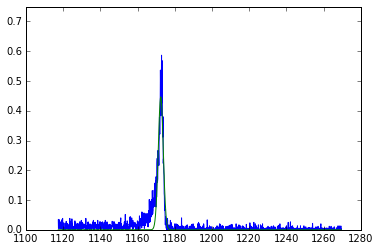

In [1919]:
popt, pcov = curve_fit(gauss, energies[11000:12500], co60[11000:12500], p0=[1, 1173, 0.8])
print(popt)
plt.plot(energies[11000:12500], co60[11000:12500])
plt.plot(energies[11000:12500], gauss(energies[11000:12500], *popt))
plt.ylim(0,0.75)
plt.show()

In [1920]:
print("Area under the curve: {}".format(sum([co60[i] for i in range(len(co60)) if co60[i] > 0 ])))
print("Photopeak efficiency: {}".format(popt[2] / sum([co60[i] for i in range(len(co60)) if co60[i] > 0 ])))

Area under the curve: 250.383333333
Photopeak efficiency: 0.00426791333286


### 1332 keV

[  1.33156956e+03  -9.86336233e-01   8.93371639e-01]


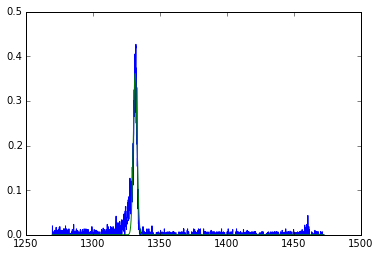

In [1921]:
popt, pcov = curve_fit(gauss, energies[12500:14500], co60[12500:14500], p0=[1, 1332, 0.8])
print(popt)
plt.plot(energies[12500:14500], co60[12500:14500])
plt.plot(energies[12500:14500], gauss(energies[12500:14500], *popt))
plt.ylim(0,0.5)
plt.show()

In [1922]:
print("Area under the curve: {}".format(sum([co60[i] for i in range(len(co60)) if co60[i] > 0 ])))
print("Photopeak efficiency: {}".format(popt[2] / sum([co60[i] for i in range(len(co60)) if co60[i] > 0 ])))

Area under the curve: 250.383333333
Photopeak efficiency: 0.00356801559955


## Cd-109

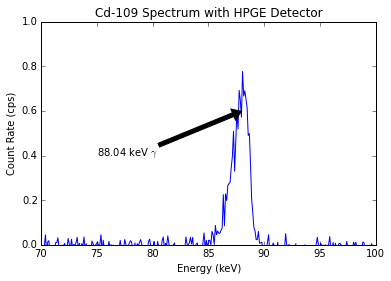

In [1923]:
plt.plot(energies, cd109)
plt.ylim(0,1)
plt.xlim(70,100)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Cd-109 Spectrum with HPGE Detector")
plt.annotate(r'88.04 keV $\gamma$', xy=(88.04,0.6), 
             xytext=(75,0.4), arrowprops=dict(facecolor="black", 
                                                shrink=0.01))
plt.show()

### 88.04 keV peak

[ 87.91714735  -0.51800147   0.88231971]


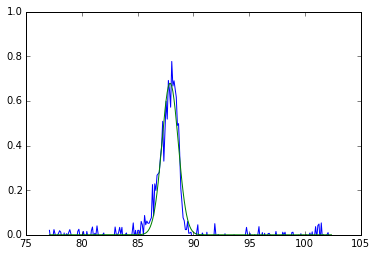

In [1924]:
popt, pcov = curve_fit(gauss, energies[750:1000], cd109[750:1000], p0=[1, 88.04, 0.8])
print(popt)
plt.plot(energies[750:1000], cd109[750:1000])
plt.plot(energies[750:1000], gauss(energies[750:1000], *popt))
plt.ylim(0,1)
plt.show()

In [1925]:
print("Area under the curve: {}".format(sum([cd109[i] for i in range(len(cd109)) if cd109[i] > 0 ])))
print("Photopeak efficiency: {}".format(popt[2] / sum([cd109[i] for i in range(len(cd109)) if cd109[i] > 0 ])))

Area under the curve: 42.65
Photopeak efficiency: 0.0206874491794


## Ba-133

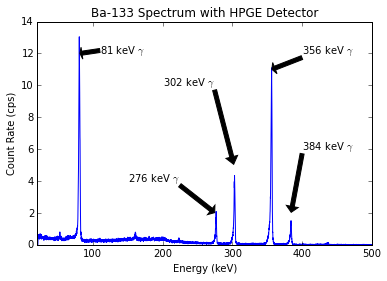

In [1926]:
plt.plot(energies, ba133)
plt.ylim(0,14)
plt.xlim(20,500)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Ba-133 Spectrum with HPGE Detector")
plt.annotate(r'81 keV $\gamma$', xy=(81,12), 
             xytext=(110,12), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate(r'276 keV $\gamma$', xy=(275,2), 
             xytext=(150,4), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate(r'302 keV $\gamma$', xy=(302,5), 
             xytext=(200,10), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate(r'356 keV $\gamma$', xy=(356,11), 
             xytext=(400,12), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate(r'384 keV $\gamma$', xy=(384,2), 
             xytext=(400,6), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

### 81 keV

[ 80.39915658  -0.64258271  19.47806735]


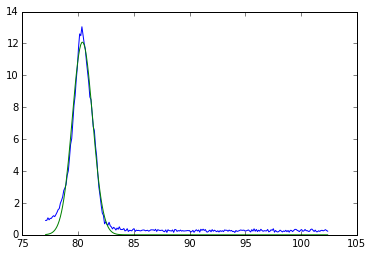

In [1927]:
popt, pcov = curve_fit(gauss, energies[750:1000], ba133[750:1000], p0=[1, 88.04, 0.8])
print(popt)
plt.plot(energies[750:1000], ba133[750:1000])
plt.plot(energies[750:1000], gauss(energies[750:1000], *popt))
plt.ylim(0,14)
plt.show()

In [1928]:
print("Area under the curve: {}".format(
    sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))

Area under the curve: 1509.79
Photopeak efficiency: 0.0129011765531


### 276 keV

[ 276.39533852    0.5795431     2.51974094]


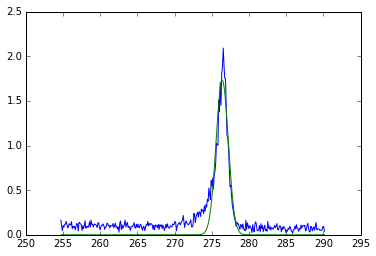

In [1929]:
popt, pcov = curve_fit(gauss, energies[2500:2850], ba133[2500:2850], p0=[1, 88.04, 0.8])
print(popt)
plt.plot(energies[2500:2850], ba133[2500:2850])
plt.plot(energies[2500:2850], gauss(energies[2500:2850], *popt))
plt.ylim(0,2.5)
plt.show()

In [1930]:
print("Area under the curve: {}".format(
    sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))

Area under the curve: 1509.79
Photopeak efficiency: 0.001668934716


### 303 keV

[ 302.82358473    0.57861487    5.61274722]


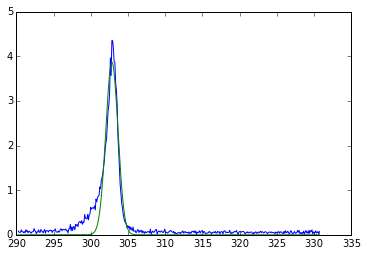

In [1931]:
popt, pcov = curve_fit(gauss, energies[2850:3250], ba133[2850:3250], p0=[1, 302, 0.8])
print(popt)
plt.plot(energies[2850:3250], ba133[2850:3250])
plt.plot(energies[2850:3250], gauss(energies[2850:3250], *popt))
plt.ylim(0,5)
plt.show()

In [1932]:
print("Area under the curve: {}".format(
    sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))

Area under the curve: 1509.79
Photopeak efficiency: 0.00371756815424


### 356 keV

[ 355.92859069   -0.59989225   15.03204682]


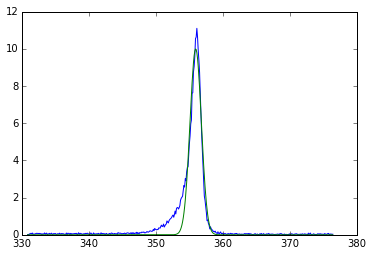

In [1933]:
popt, pcov = curve_fit(gauss, energies[3250:3700], ba133[3250:3700], p0=[1, 356, 0.8])
print(popt)
plt.plot(energies[3250:3700], ba133[3250:3700])
plt.plot(energies[3250:3700], gauss(energies[3250:3700], *popt))
plt.ylim(0,12)
plt.show()

In [1934]:
print("Area under the curve: {}".format(
    sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))

Area under the curve: 1509.79
Photopeak efficiency: 0.00995638255618


### 384 keV

[ 383.74293566   -0.6488432     2.1091301 ]


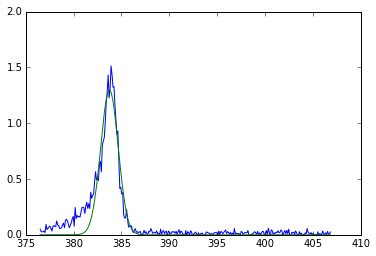

In [1935]:
popt, pcov = curve_fit(gauss, energies[3700:4000], ba133[3700:4000], p0=[1, 385, 0.8])
print(popt)
plt.plot(energies[3700:4000], ba133[3700:4000])
plt.plot(energies[3700:4000], gauss(energies[3700:4000], *popt))
plt.ylim(0,2)
plt.show()

In [1936]:
print("Area under the curve: {}".format(
    sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ba133[i] for i in range(len(ba133)) if ba133[i] > 0 ])
))

Area under the curve: 1509.79
Photopeak efficiency: 0.00139696918285


## Cs-137

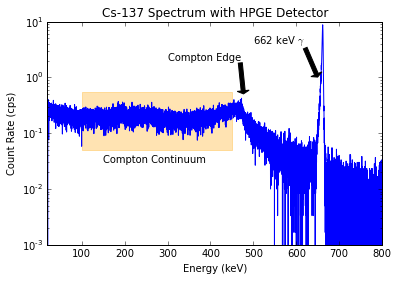

In [1937]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(energies, cs137)
ax1.set_xlim([20,800])
ax1.set_yscale('log')
ax1.set_ylabel("Count Rate (cps)")
ax1.set_xlabel("Energy (keV)")
ax1.set_title("Cs-137 Spectrum with HPGE Detector")
ax1.annotate('Compton Edge', xy=(477,0.5), 
             xytext=(300,2), arrowprops=dict(facecolor="black", shrink=0.01))
ax1.annotate(r'662 keV $\gamma$', xy=(650,1), 
             xytext=(500,4), arrowprops=dict(facecolor="black", shrink=0.01))
ax1.add_patch(
    patches.Rectangle(
        (100,0.05),
        350, 
        0.5,
        alpha=0.3,
        color="orange"
    )
)
ax1.text(150,0.03,"Compton Continuum")
plt.show()

### 662 keV

[ 661.2394476     0.77372839   15.33106113]


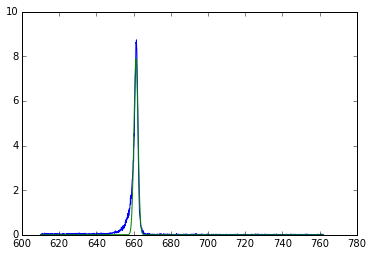

In [1938]:
popt, pcov = curve_fit(gauss, energies[6000:7500], cs137[6000:7500], p0=[1, 385, 0.8])
print(popt)
plt.plot(energies[6000:7500], cs137[6000:7500])
plt.plot(energies[6000:7500], gauss(energies[6000:7500], *popt))
plt.ylim(0,10)
plt.show()

In [1939]:
661.7 * (1 - (1 / (1 + 2 * 661.7 / 511)))

477.3734081988661

In [1940]:
print("Area under the curve: {}".format(
    sum([cs137[i] for i in range(len(cs137)) if cs137[i] > 0 ])
))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([cs137[i] for i in range(len(cs137)) if cs137[i] > 0 ])
))

Area under the curve: 1333.6
Photopeak efficiency: 0.0114959966472


# Spectroscopy with CZT Detector

In [1941]:
datadir = os.path.join(rootdatadir, "czt/")

### Loading Data

In [1942]:
def bgcorrcountrate(spefile, datadir=datadir, bgfile="Background_600sec.Spe"):
    d = spedata(spefile, datadir) / spetime(spefile, datadir)
    b = spedata(bgfile, datadir) / spetime(bgfile, datadir)
    
    c = np.array(d - b)
    c[c < 0] = 0
    return c

In [1943]:
na22 = bgcorrcountrate("Na_22_300sec.Spe")
co57 = bgcorrcountrate("Co_57_300sec.Spe")
co60 = bgcorrcountrate("Co_60_600sec.Spe")
cd109 = bgcorrcountrate("Cd_109_300sec.Spe")
ba133 = bgcorrcountrate("Ba_133_300sec.Spe")
cs137 = bgcorrcountrate("Cs_137_120sec.Spe")

## Let's find those peaks!

In [1944]:
peak_energies = []
peak_channels = []

### Na-22

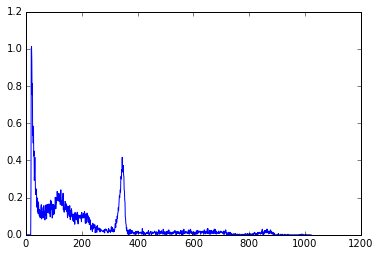

In [1945]:
plt.plot(na22)
#plt.xlim(0,400)
plt.show()

In [1946]:
start = 250
pk.indexes(na22[start:], thres=0.5, min_dist=30) + start

array([345])

In [1947]:
map(peak_energies.append, [511])
map(peak_channels.append, pk.indexes(na22[start:], thres=0.5, min_dist=30) + start)

[None]

### Co-57

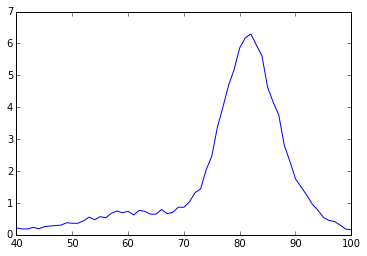

In [1948]:
plt.plot(co57)
plt.xlim(40,100)
plt.show()

In [1949]:
start = 40
pk.indexes(co57[start:100], thres=0.9, min_dist=30) + start

array([82])

In [1950]:
map(peak_energies.append, [122])
map(peak_channels.append, pk.indexes(co57[start:100], thres=0.9, min_dist=30) + start)

[None]

### Co-60

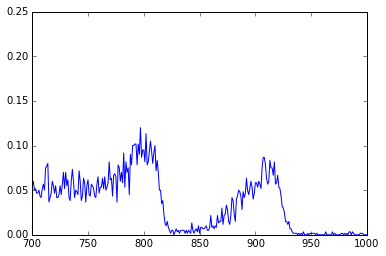

In [1951]:
plt.plot(co60)
plt.xlim(700,1000)
plt.show()

In [1952]:
start = 700
pk.indexes(co60[start:], thres=0.7, min_dist=30) + start

array([797, 907])

In [1953]:
map(peak_energies.append, [1173, 1332])
map(peak_channels.append, pk.indexes(co60[start:], thres=0.7, min_dist=30) + start)

[None, None]

### Cd-109

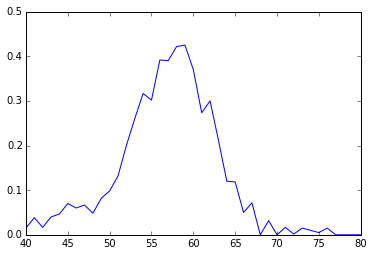

In [1954]:
plt.plot(cd109)
plt.xlim(40,80)
plt.ylim(0,0.5)
plt.show()

In [1955]:
start = 40
pk.indexes(cd109[start:], thres=0.7, min_dist=30) + start

array([59])

In [1956]:
map(peak_energies.append, [88.04])
map(peak_channels.append, pk.indexes(cd109[start:], thres=0.7, min_dist=30) + start)

[None]

### Ba-133

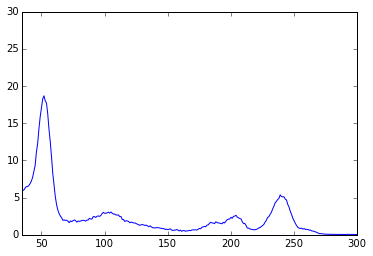

In [1957]:
plt.plot(ba133)
plt.xlim(35,300)
plt.show()

In [1958]:
start = 35
pk.indexes(ba133[start:], thres=0.2, min_dist=10) + start

array([ 52, 239])

In [1959]:
map(peak_energies.append, [80.99, 356.017])
map(peak_channels.append, pk.indexes(ba133[start:], thres=0.2, min_dist=10) + start)

[None, None]

### Cs-137

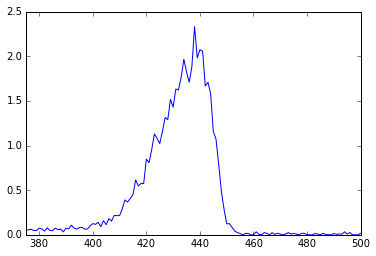

In [1960]:
plt.plot(cs137[10:])
plt.xlim(375,500)
plt.show()

In [1961]:
start = 375
pk.indexes(cs137[start:], thres=0.2, min_dist=50) + start

array([448])

In [1962]:
map(peak_energies.append, [662])
map(peak_channels.append, pk.indexes(cs137[start:], thres=0.2, min_dist=50) + start)

[None]

In [1963]:
print(peak_energies)
print(peak_channels)
fit = stats.linregress(peak_channels, peak_energies)
print fit.rvalue ** 2

[511, 122, 1173, 1332, 88.04, 80.99, 356.017, 662]
[345, 82, 797, 907, 59, 52, 239, 448]
0.999987961764


1.46647574024 * x + 3.71744460556


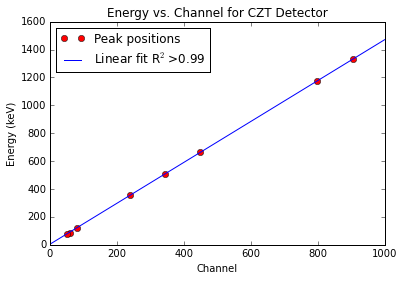

In [1964]:
plt.plot(peak_channels, peak_energies, 'ro', label="Peak positions")
c2eczt = lambda x: fit.slope * x + fit.intercept
print("{} * x + {}".format(fit.slope, fit.intercept))
energies = c2eczt(np.arange(0,len(na22),1))
plt.plot(np.linspace(0,1000,1000), c2eczt(np.linspace(0,1000,1000)), 
         label=r'Linear fit R$^2$>0.99')
plt.xlabel("Channel")
plt.ylabel("Energy (keV)")
plt.title("Energy vs. Channel for CZT Detector")
plt.legend(loc="upper left")
plt.show()

In [1965]:
e2cczt = lambda x: int((x - fit.intercept) / fit.slope)

## Isotope analysis

### Na-22

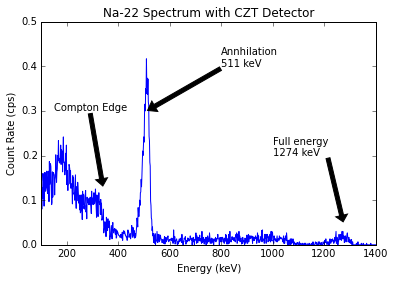

In [1966]:
plt.plot(energies, na22)
plt.ylim(0,0.5)
plt.xlim(100,1400)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Na-22 Spectrum with CZT Detector")
plt.annotate('Full energy\n1274 keV', xy=(1274,0.05),
             xytext=(1000,0.2), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('Annhilation\n511 keV', xy=(511,0.3),
             xytext=(800,0.4), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('Compton Edge', xy=(0.667*511,0.13),
             xytext=(150,0.3), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

#### 511 keV peak

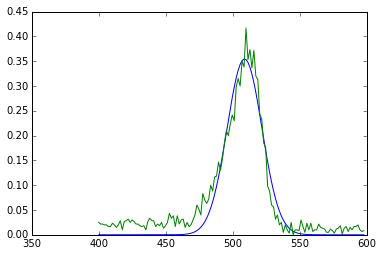

In [1967]:
popt, pcov = curve_fit(gauss, energies[e2cczt(400):e2cczt(600)], na22[e2cczt(400):e2cczt(600)], p0=[100, 511, 0.8])
plt.plot(energies[e2cczt(400):e2cczt(600)], gauss(energies[e2cczt(400):e2cczt(600)], *popt))
plt.plot(energies[e2cczt(400):e2cczt(600)], na22[e2cczt(400):e2cczt(600)])
plt.show()

In [1968]:
popt

array([ 508.54684425,    9.20260676,    8.17928527])

In [1969]:
print("Area under the curve: {}".format(
    sum([na22[i] for i in range(len(na22)) if na22[i] > 0 ])))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([na22[i] for i in range(len(na22)) if na22[i] > 0 ])))

Area under the curve: 50.825
Photopeak efficiency: 0.160930354531


#### 1274 keV peak

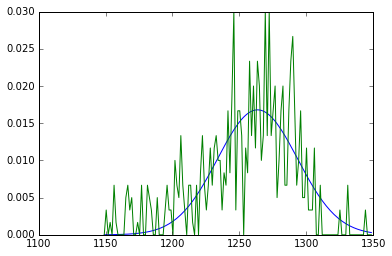

In [1970]:
popt, pcov = curve_fit(
    gauss, 
    energies[e2cczt(1150):e2cczt(1350)], 
    na22[e2cczt(1150):e2cczt(1350)], 
    p0=[100, 511, 0.8]
)
plt.plot(
    energies[e2cczt(1150):e2cczt(1350)], 
    gauss(energies[e2cczt(1150):e2cczt(1350)], *popt)
)
plt.plot(
    energies[e2cczt(1150):e2cczt(1350)], 
    na22[e2cczt(1150):e2cczt(1350)]
)
plt.show()

In [1971]:
popt

array([  1.26352340e+03,  -2.11930511e+01,   8.92222728e-01])

In [1972]:
print("Area under the curve: {}".format(
    sum([na22[i] for i in range(len(na22)) if na22[i] > 0 ])))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([na22[i] for i in range(len(na22)) if na22[i] > 0 ])))

Area under the curve: 50.825
Photopeak efficiency: 0.0175548003496


### Co-57

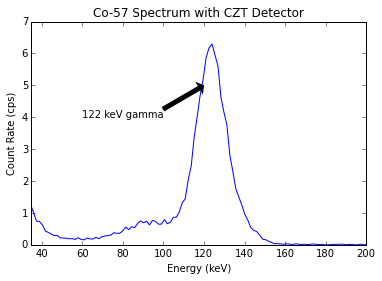

In [1973]:
plt.plot(energies, co57)
#plt.ylim(0,0.5)
plt.xlim(35,200)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Co-57 Spectrum with CZT Detector")
plt.annotate('122 keV gamma', xy=(120,5),
             xytext=(60,4), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

#### 122 keV

[ 123.53179942   -5.71704796   85.30029907]


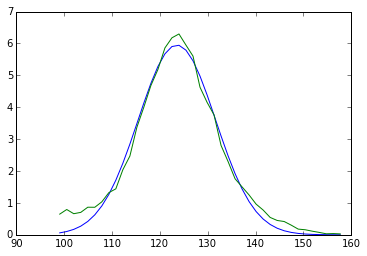

In [1974]:
r_low = e2cczt(100)

r_high = e2cczt(160)
popt, pcov = curve_fit(gauss, energies[r_low:r_high], 
    co57[r_low:r_high], p0=[122, 20, 20])
plt.plot(energies[r_low:r_high], 
         gauss(energies[r_low:r_high], *popt))
plt.plot(energies[r_low:r_high], 
         co57[r_low:r_high])
print(popt)
plt.show()

In [1975]:
popt

array([ 123.53179942,   -5.71704796,   85.30029907])

In [1976]:
ph = co57
print("Area under the curve: {}".format(
    sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))

Area under the curve: 110.97
Photopeak efficiency: 0.768678913807


### Co-60

In [1977]:
ph = co60

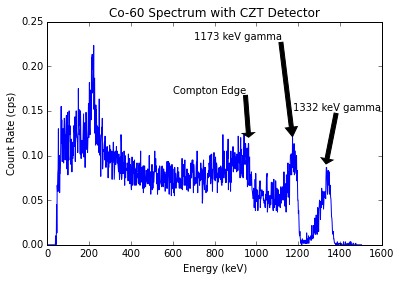

In [1978]:
plt.plot(energies, ph)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Co-60 Spectrum with CZT Detector")
plt.annotate('1173 keV gamma', xy=(1173,0.12),
             xytext=(700,0.23), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('1332 keV gamma', xy=(1332,0.09),
             xytext=(1173,0.15), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('Compton Edge', xy=(963,0.12),
             xytext=(600,0.17), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

#### 1173 keV

[ 1158.62278797    25.51714351     5.71585089]


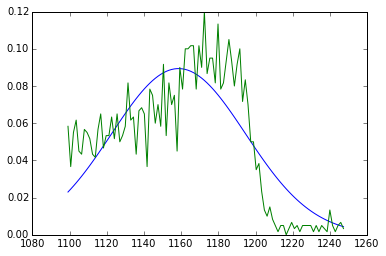

In [1979]:
r_low = e2cczt(1100)
r_high = e2cczt(1250)

popt, pcov = curve_fit(gauss, energies[r_low:r_high], 
    ph[r_low:r_high], p0=[1173, 20, 20])
plt.plot(energies[r_low:r_high], 
         gauss(energies[r_low:r_high], *popt))
plt.plot(energies[r_low:r_high], 
         ph[r_low:r_high])
print(popt)
plt.show()

In [1980]:
print("Area under the curve: {}".format(
    sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))

Area under the curve: 71.5166666667
Photopeak efficiency: 0.0799233403122


#### 1332 keV

[ 1329.59603841    18.32897608     3.13340771]


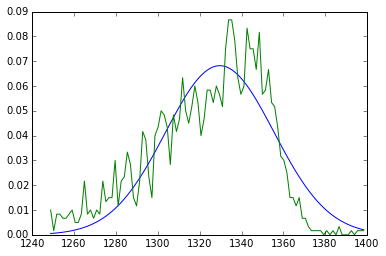

In [1981]:
r_low = e2cczt(1250)
r_high = e2cczt(1400)

popt, pcov = curve_fit(gauss, energies[r_low:r_high], 
    ph[r_low:r_high], p0=[1332, 20, 20])
plt.plot(energies[r_low:r_high], 
         gauss(energies[r_low:r_high], *popt))
plt.plot(energies[r_low:r_high], 
         ph[r_low:r_high])
print(popt)
plt.show()

In [1982]:
print("Area under the curve: {}".format(
    sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))

Area under the curve: 71.5166666667
Photopeak efficiency: 0.043813671039


### Cd-109

In [1983]:
ph = cd109

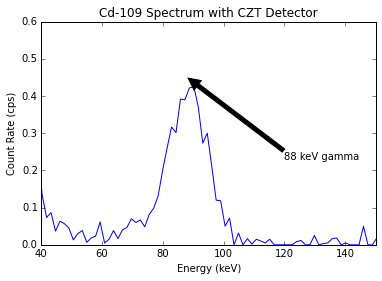

In [1984]:
plt.plot(energies, ph)
plt.xlim(40,150)
plt.ylim(0,0.6)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Cd-109 Spectrum with CZT Detector")
plt.annotate('88 keV gamma', xy=(88.04,0.45),
             xytext=(120,0.23), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

#### 88.04 keV

[ 88.14872398   4.82522471   4.94324523]


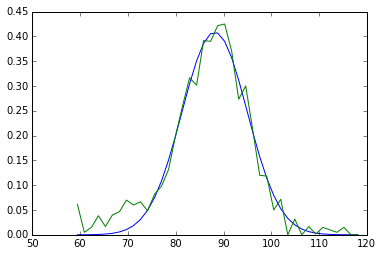

Area under the curve: 13.0983333333
Photopeak efficiency: 0.377394978811


In [1985]:
r_low = e2cczt(60)
r_high = e2cczt(120)

popt, pcov = curve_fit(gauss, energies[r_low:r_high], 
    ph[r_low:r_high], p0=[88, 20, 20])
plt.plot(energies[r_low:r_high], 
         gauss(energies[r_low:r_high], *popt))
plt.plot(energies[r_low:r_high], 
         ph[r_low:r_high])
print(popt)
plt.show()
print("Area under the curve: {}".format(
    sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))

### Ba-133

In [1986]:
ph = ba133

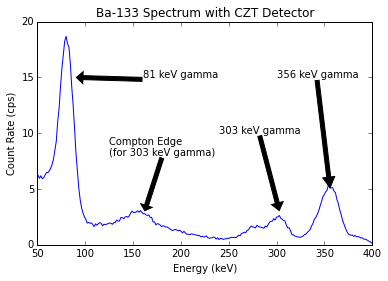

In [1987]:
ph = ba133
plt.plot(energies, ph)
plt.xlim(50,400)
plt.ylim(0,20)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Ba-133 Spectrum with CZT Detector")
plt.annotate('356 keV gamma', xy=(356,5),
             xytext=(300,15), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('303 keV gamma', xy=(303,3),
             xytext=(240,10), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('Compton Edge\n(for 303 keV gamma)', xy=(162,3),
             xytext=(125,8), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('81 keV gamma', xy=(90,15),
             xytext=(160,15), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

#### 80.99 keV

[  77.99038306   -8.81102742  348.97379974]


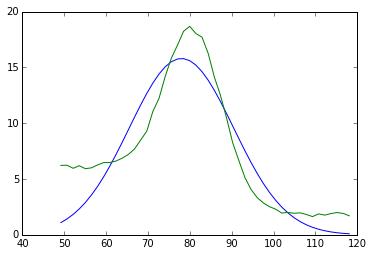

Area under the curve: 879.76
Photopeak efficiency: 0.396669318609


In [1988]:
r_low = e2cczt(50)
r_high = e2cczt(120)

popt, pcov = curve_fit(gauss, energies[r_low:r_high], 
    ph[r_low:r_high], p0=[80, 20, 20])
plt.plot(energies[r_low:r_high], 
         gauss(energies[r_low:r_high], *popt))
plt.plot(energies[r_low:r_high], 
         ph[r_low:r_high])
print(popt)
plt.show()
print("Area under the curve: {}".format(
    sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))

#### 356 keV

[ 354.733575     -8.37302008  106.49413438]


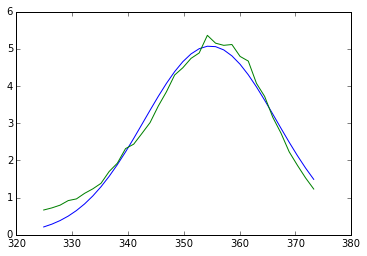

Area under the curve: 879.76
Photopeak efficiency: 0.121049075178


In [1989]:
r_low = e2cczt(325)
r_high = e2cczt(375)

popt, pcov = curve_fit(gauss, energies[r_low:r_high], 
    ph[r_low:r_high], p0=[350, 20, 20])
plt.plot(energies[r_low:r_high], 
         gauss(energies[r_low:r_high], *popt))
plt.plot(energies[r_low:r_high], 
         ph[r_low:r_high])
print(popt)
plt.show()
print("Area under the curve: {}".format(
    sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))

### Cs-137

In [1990]:
ph = cs137

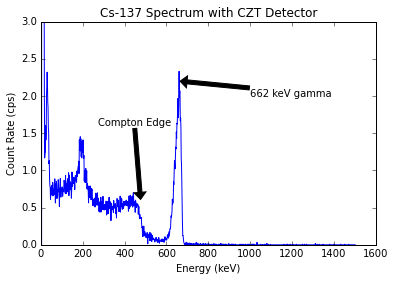

In [1991]:
plt.plot(energies, ph)
plt.ylim(0,3)
plt.ylabel("Count Rate (cps)")
plt.xlabel("Energy (keV)")
plt.title("Cs-137 Spectrum with CZT Detector")
plt.annotate('662 keV gamma', xy=(662,2.2),
             xytext=(1000,2.0), arrowprops=dict(facecolor="black", shrink=0.01))
plt.annotate('Compton Edge', xy=(477,0.6),
             xytext=(275,1.6), arrowprops=dict(facecolor="black", shrink=0.01))
plt.show()

#### 662 keV

[ 655.89639424   10.03084027   49.29468118]


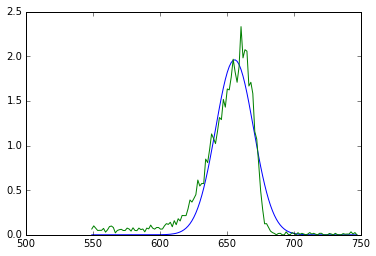

Area under the curve: 4314.365
Photopeak efficiency: 0.0114257095028


In [1992]:
r_low = e2cczt(550)
r_high = e2cczt(750)

popt, pcov = curve_fit(gauss, energies[r_low:r_high], 
    ph[r_low:r_high], p0=[662, 20, 20])
plt.plot(energies[r_low:r_high], 
         gauss(energies[r_low:r_high], *popt))
plt.plot(energies[r_low:r_high], 
         ph[r_low:r_high])
print(popt)
plt.show()
print("Area under the curve: {}".format(
    sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))
print("Photopeak efficiency: {}".format(
    popt[2] / sum([ph[i] for i in range(len(ph)) if ph[i] > 0 ])))